## DECISION TREE

### Objective:

##### The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

### 1) Data Preparation:

##### Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [173]:
df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [174]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [175]:
df.shape

(908, 13)

In [176]:
df['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

### 2) Exploratory Data Analysis (EDA):

##### Perform exploratory data analysis to understand the structure of the dataset.
##### Check for missing values, outliers, and inconsistencies in the data.
##### Visualize the distribution of features, including histograms, box plots, and correlation matrices.

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [306]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.787211,133.264609,207.232359,135.977949,0.882533,1.007718
std,9.162016,19.303104,97.148377,26.809967,1.020365,1.144594
min,29.000000,84.000000,36.250000,61.000000,-2.250000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,180.000000,410.250000,202.000000,3.750000,4.000000


In [178]:
### Checking duplicate values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [179]:
df.isnull().sum().sum()/len(df)*100
### more than 5%, so we cannot just drop the columns

6.828193832599119

In [180]:
df.fillna({'oldpeak':df.oldpeak.mean()},inplace=True)

In [181]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [182]:
### checking for duplicate values
df.duplicated().sum()

1

In [183]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [184]:
df.duplicated().sum()

0

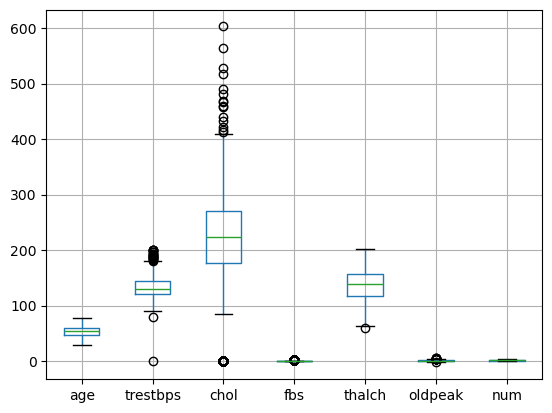

In [185]:
### Checking outliers in the data
df.boxplot()
plt.show()

In [186]:
### outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)
# Each and every column is selected and done outlier capping

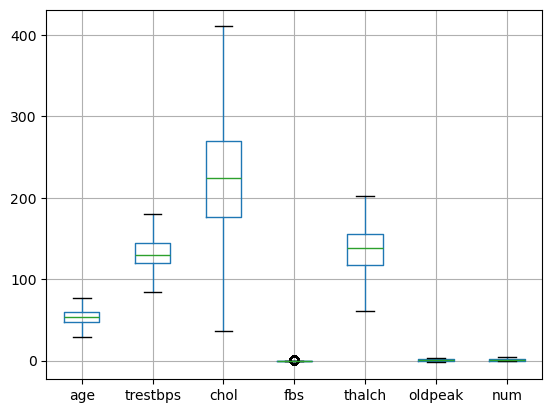

In [187]:
df.boxplot()
plt.show()

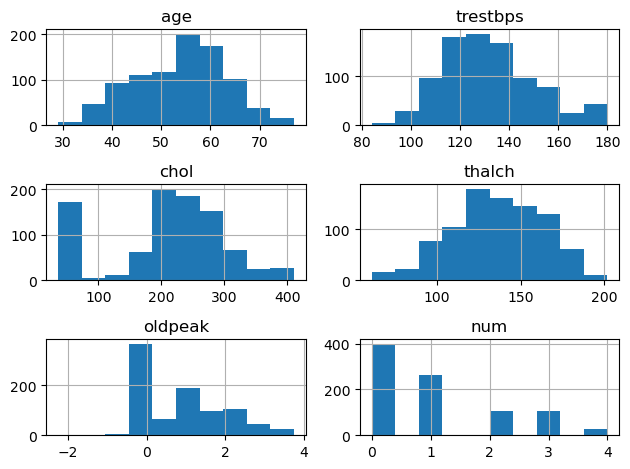

In [188]:
df.hist()
plt.tight_layout()
plt.show()

### 3) Feature Engineering:

##### If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [189]:
target=df[['num']]
features=df.drop(columns=['num'])

In [190]:
target.head()

,num
0,0
1,0
2,0
3,0
4,0


In [191]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect
1,41,Male,atypical angina,135.0,203.0,False,normal,132.0,False,0.0,flat,fixed defect
2,57,Male,asymptomatic,140.0,192.0,False,normal,148.0,False,0.4,flat,fixed defect
3,52,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,False,0.0,flat,fixed defect
4,57,Male,asymptomatic,110.0,201.0,False,normal,126.0,True,1.5,flat,fixed defect


In [192]:
df.dtypes

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [193]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

### Labelling

In [194]:
ord_enc=OrdinalEncoder()

In [195]:
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','thal']

In [196]:
features[categorical_cols] = features[categorical_cols].astype(str)
features[categorical_cols] = ord_enc.fit_transform(features[categorical_cols])

In [197]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1.0,3.0,145.0,233.0,1.0,0.0,150.0,1.0,2.3,0.0,0.0
1,41,1.0,1.0,135.0,203.0,0.0,1.0,132.0,1.0,0.0,1.0,0.0
2,57,1.0,0.0,140.0,192.0,0.0,1.0,148.0,1.0,0.4,1.0,0.0
3,52,1.0,3.0,118.0,186.0,0.0,0.0,190.0,1.0,0.0,1.0,0.0
4,57,1.0,0.0,110.0,201.0,0.0,1.0,126.0,3.0,1.5,1.0,0.0


### Scaling

In [198]:
std_sca=StandardScaler()

In [199]:
features[['age','trestbps','chol','thalch','oldpeak']]=std_sca.fit_transform(features[['age','trestbps','chol','thalch','oldpeak']])

In [200]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006097,1.0,3.0,0.608289,0.265386,1.0,0.0,0.523305,1.0,1.389942,0.0,0.0
1,-1.396447,1.0,1.0,0.089952,-0.043590,0.0,1.0,-0.148458,1.0,-0.865396,1.0,0.0
2,0.350858,1.0,0.0,0.349120,-0.156881,0.0,1.0,0.448665,1.0,-0.473163,1.0,0.0
3,-0.195175,1.0,3.0,-0.791221,-0.218677,0.0,0.0,2.016110,1.0,-0.865396,1.0,0.0
4,0.350858,1.0,0.0,-1.205891,-0.064188,0.0,1.0,-0.372378,3.0,0.605477,1.0,0.0


In [201]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [202]:
df.shape

(907, 13)

<Figure size 1000x1000 with 0 Axes>

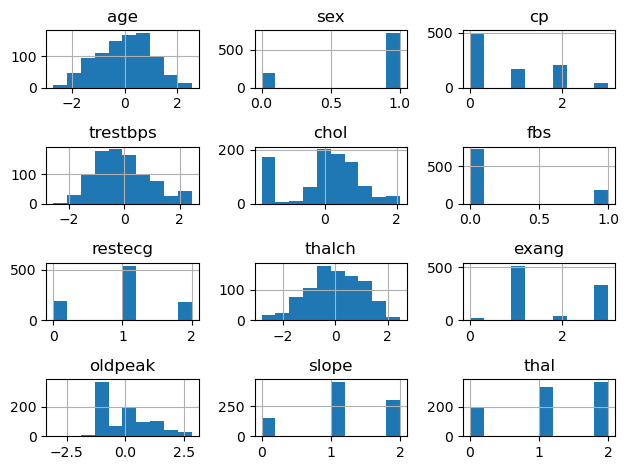

In [203]:
plt.figure(figsize=(10,10))
features.hist()
plt.tight_layout()
plt.show()

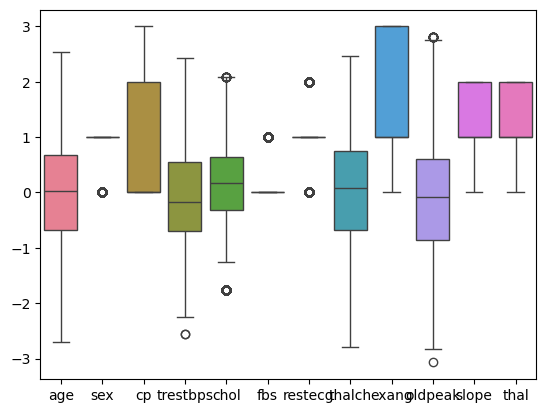

In [204]:
sns.boxplot(data=features)
plt.show()

In [205]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in features.select_dtypes(['int','float']).columns:
    outlier_capping(features,col)
# Each and every column is selected and done outlier capping

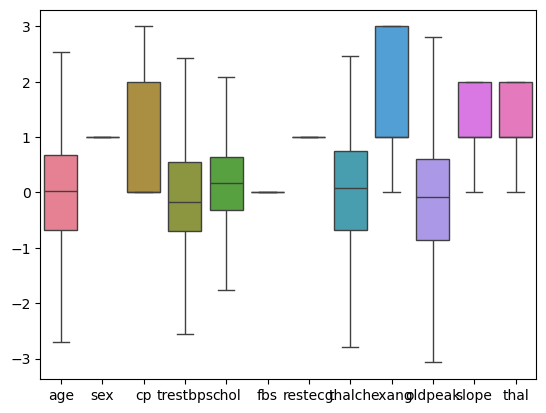

In [206]:
sns.boxplot(data=features)
plt.show()

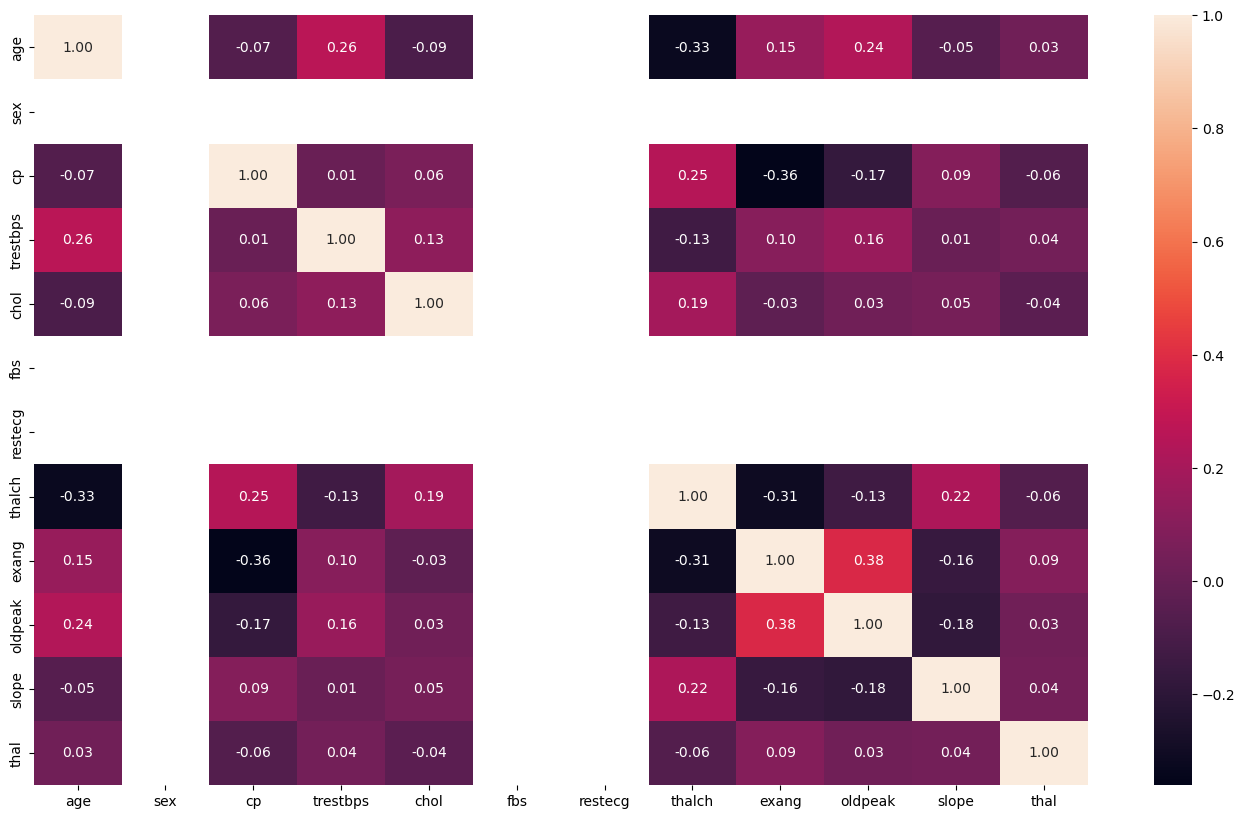

In [207]:
corr=features.corr()
plt.figure(figsize=(17,10))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show()

In [208]:
### most of the features have very correlation with every other features, so we are going to do f_classification

In [209]:
from sklearn.feature_selection import f_classif

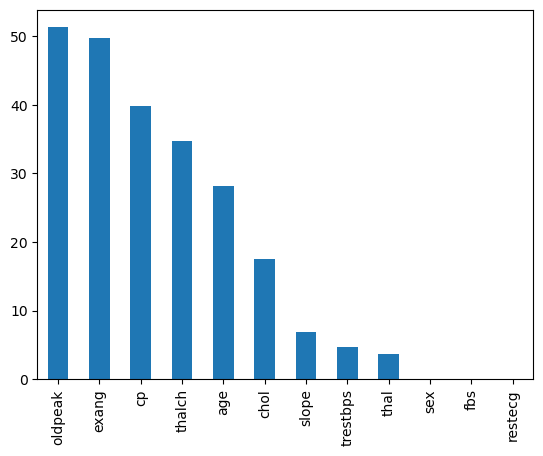

In [210]:
f_class=f_classif(features,target)
pd.Series(f_class[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [211]:
features.drop(columns=['sex','fbs','restecg'],inplace=True)

In [212]:
features.head()

,age,cp,trestbps,chol,thalch,exang,oldpeak,slope,thal
0,1.006097,3.0,0.608289,0.265386,0.523305,1.0,1.389942,0.0,0.0
1,-1.396447,1.0,0.089952,-0.043590,-0.148458,1.0,-0.865396,1.0,0.0
2,0.350858,0.0,0.349120,-0.156881,0.448665,1.0,-0.473163,1.0,0.0
3,-0.195175,3.0,-0.791221,-0.218677,2.016110,1.0,-0.865396,1.0,0.0
4,0.350858,0.0,-1.205891,-0.064188,-0.372378,3.0,0.605477,1.0,0.0


In [213]:
### Feature engineering has been completed . We removed three features which had very low correlation with the target.

### 4) Decision Tree Classification:

##### Split the dataset into training and testing sets (e.g., using an 80-20 split).

In [217]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100,stratify=target)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(725, 9)
(182, 9)
(725, 1)
(182, 1)


##### Implement a Decision Tree Classification model using a library like scikit-learn.

In [280]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5,min_samples_split=2)

##### Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [281]:
dec_tree.fit(x_train,y_train)
y_pred=dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.5494505494505495

In [270]:
from sklearn.metrics import classification_report

In [271]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        80
           1       0.45      0.38      0.41        53
           2       0.42      0.23      0.29        22
           3       0.22      0.29      0.25        21
           4       0.50      0.17      0.25         6

    accuracy                           0.55       182
   macro avg       0.46      0.38      0.39       182
weighted avg       0.53      0.55      0.53       182



### 5) Hyperparameter Tuning:

##### Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [272]:
from sklearn.model_selection import GridSearchCV

In [282]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,7),'min_samples_split':[0,1,2,3,4,5]}

In [283]:
grid_search=GridSearchCV(estimator=dec_tree,param_grid=params,cv=5)

In [284]:
grid_search.fit(x_train,y_train)

,estimator,DecisionTreeC...r(max_depth=5)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': range(1, 7), 'min_samples_split': [0, 1, ...], 'splitter': ['best', 'random']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [285]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_split': 2,
 'splitter': 'random'}

In [286]:
grid_search.best_score_

0.5613793103448275

### 6) Model Evaluation and Analysis:

##### Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

In [289]:
dec_tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=2,splitter='random')

In [290]:
dec_tree.fit(x_train,y_train)
y_pred=dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.5659340659340659

##### Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [299]:
x_train.head()

,age,cp,trestbps,chol,thalch,exang,oldpeak,slope,thal
384,2.207368,2.0,2.422469,-1.760984,-0.148458,0.0,0.008550,1.0,2.0
150,-1.287240,2.0,-0.687554,0.337481,2.165391,1.0,-0.080931,0.0,2.0
616,0.460064,2.0,1.385795,0.038804,-1.641263,1.0,-0.865396,2.0,1.0
109,-0.195175,1.0,-0.687554,1.212914,1.344348,1.0,-0.669280,2.0,1.0
540,0.350858,0.0,0.867458,0.491969,-1.641263,3.0,2.076349,1.0,0.0


In [301]:
class_names_str = [str(x) for x in target.num.unique()]

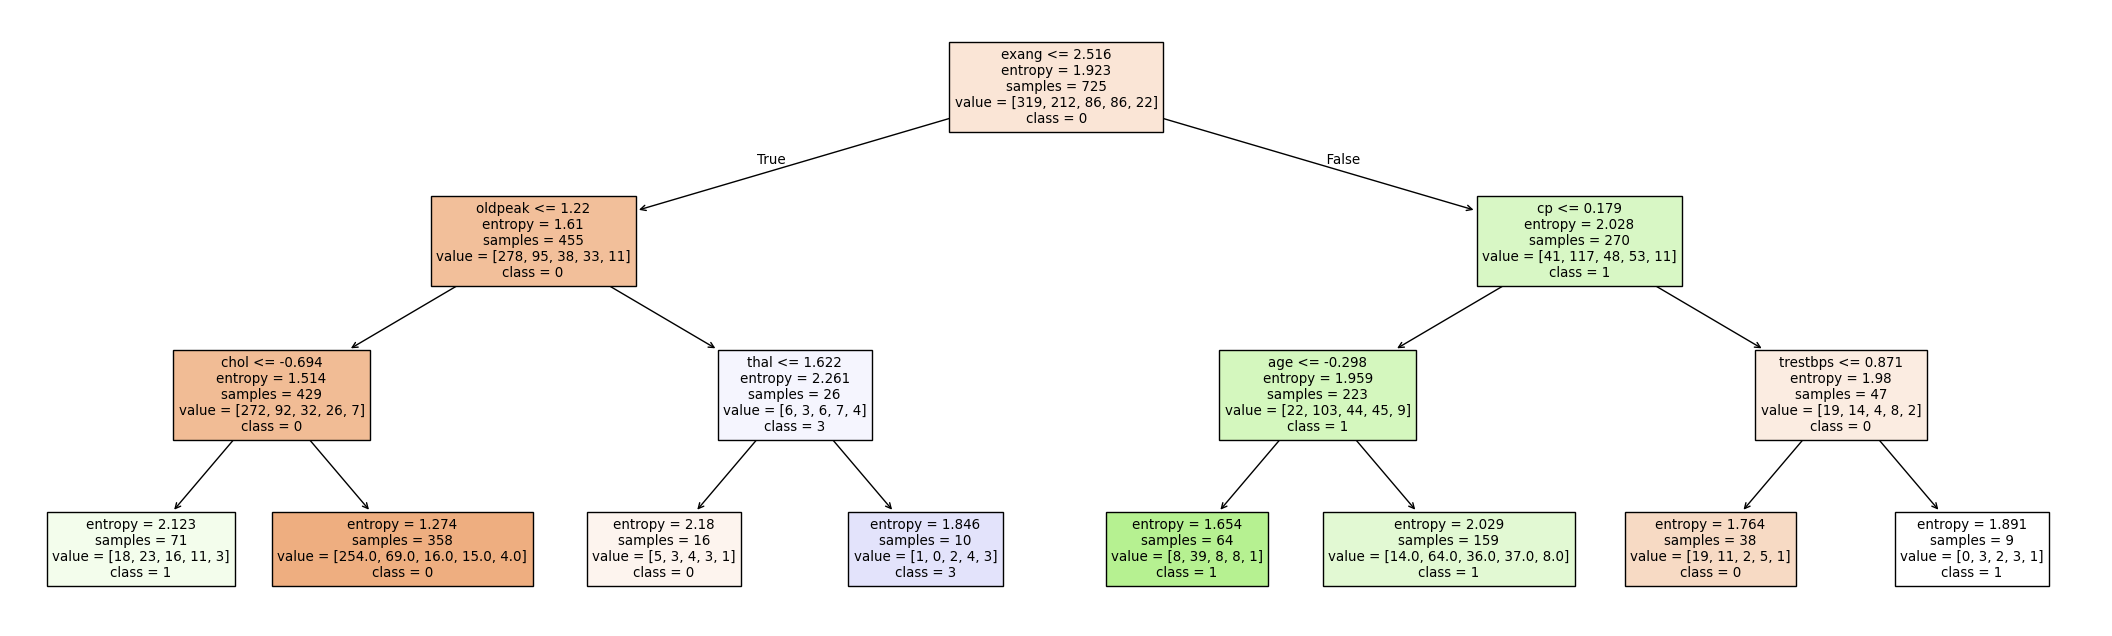

In [305]:
plt.figure(figsize=(27,8))
plot_tree(dec_tree,filled=True,feature_names=list(features.columns),class_names=class_names_str)
plt.show()

### Interview questions

##### 1) What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

##### 2) What is the difference between the Label encoding and One-hot encoding?